In [4]:
import sklearn
from sklearn import datasets, linear_model
import pandas as pd

# Spam letter classification
# Use the sklearn library to determine whether a letter is spam letter or not.

In [26]:
# 以下是筆記

# Clustering:
# SVM, K-means, DBScan
# Classification:
# NN, decision tree, KNN, naive bayes

# 這種datasets.load_bla 是內建的，不用上網fetch資料
# datasets.load_iris([return_X_y=False])

# EX:
boston = datasets.load_boston()
boston.keys()
boston.feature_names

# Linear Regression

# first, initialize the model
lr = linear_model.LinearRegression(
    fit_intercept=True, 
    normalize=False,
    copy_X = True,
    n_jobs=1)
X = boston.data
y = boston.target

lr.fit(X, y, sample_weight=None)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# type(lr.coef_) is nd.array
myzip = zip(boston.feature_names, lr.coef_)
pd.DataFrame(list(myzip), 
             columns=["Feature", "Correlation"])

# 看出來 "feature RM" is highly correlated to the target (3.8多)

,Feature,Correlation
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


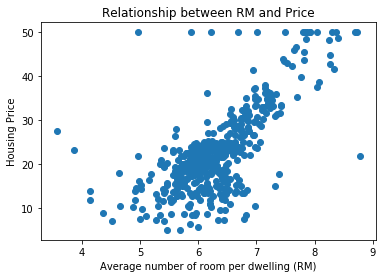

In [28]:
from matplotlib import pyplot as plt
plt.scatter(X[:,5], y) # X[:, 5] 是 RM
plt.xlabel("Average number of room per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

[ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232]


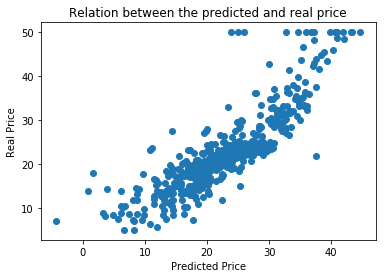

In [29]:
predictY = lr.predict(X) # 用來 predict training data
print(predictY[0:5]) # v.s. y[0:5]
plt.scatter(predictY, y)
plt.xlabel("Predicted Price")
plt.ylabel("Real Price")
plt.title("Relation between the predicted and real price")
plt.show()

In [30]:
# Cross Validation 以某個比率切 data，會先打亂，切完後分成 train 和 test 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33)
print(X_test.shape)

(167, 13)


In [19]:
# predict IRIS dataset with Logistic Regression

# 某些情況會需要「與這個class相似的機率多少？」,例如：這樣的徵兆有80%是癌症?
# 這樣的分類稱之soft classification,
# 典型處理soft classification的演算法Logistic Regression

iris = datasets.load_iris()
logr = linear_model.LogisticRegression( 
    penalty='l2', # try 'l1'
    solver='liblinear', 
    multi_class='ovr', 
    verbose=0, 
    C=1e5, # 給了一個參數C ,該參數用於控制overfitting程度,數字越大,Regularization強度越低
    n_jobs=1)

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(iris.data, iris.target, test_size = 0.16)

print(Xtrain.shape) #  (150, 4) -> (126, 4), 就是 150 * 0.84
logr.fit(Xtrain, ytrain)
print(logr.score(Xtrain, ytrain))
print(logr.score(Xtest, ytest))

(126, 4)
0.97619047619
0.958333333333


In [36]:
# 處理 multi-class 問題，有兩種演算法
# 1. 一對剩下(one v.s. rest)：對於每一個class，拿來和剩下的全部比，幫這個class建model，所以共 n 個 models
# 就是上方例子, the default value is “ovr”

# 2. 一對一(one v.s. one)：對於每一個class，拿來和剩下的每一個class單獨比，所以有 n(n-1)/2 個 models
# solver 要換成 newton-conjugate-gradient 才可以
logr3 = linear_model.LogisticRegression(multi_class='multinomial', solver = 'newton-cg') 
logr3.fit(Xtrain, ytrain)
print(logr3.score(Xtrain, ytrain))
print(logr3.score(Xtest, ytest))

# 好用： .predict() 生出最後的label
print(logr3.predict(Xtest))
print(ytest)
# .predict_proba() 生出
print(Xtest)
print(logr3.predict_proba(Xtest)) # 在第 i 個 row，我猜他是label=0的機率是 9.7e-01, label=1的機率是 2.8e-02，label=2的...bla

0.968253968254
0.958333333333
[0 2 0 0 1 0 2 2 2 1 2 2 2 1 0 1 1 1 0 2 1 2 2 0]
[0 2 0 0 1 0 2 2 2 1 2 2 2 1 0 1 2 1 0 2 1 2 2 0]
[[ 5.1  3.4  1.5  0.2]
 [ 7.7  2.8  6.7  2. ]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.   1.6  0.2]
 [ 6.3  2.3  4.4  1.3]
 [ 5.2  3.4  1.4  0.2]
 [ 6.2  3.4  5.4  2.3]
 [ 6.4  2.8  5.6  2.2]
 [ 6.9  3.1  5.1  2.3]
 [ 5.   2.3  3.3  1. ]
 [ 5.6  2.8  4.9  2. ]
 [ 7.9  3.8  6.4  2. ]
 [ 7.1  3.   5.9  2.1]
 [ 5.2  2.7  3.9  1.4]
 [ 4.4  3.2  1.3  0.2]
 [ 6.6  2.9  4.6  1.3]
 [ 6.   2.2  5.   1.5]
 [ 6.9  3.1  4.9  1.5]
 [ 4.9  3.1  1.5  0.1]
 [ 6.3  2.7  4.9  1.8]
 [ 5.   2.   3.5  1. ]
 [ 7.2  3.   5.8  1.6]
 [ 6.7  3.3  5.7  2.1]
 [ 5.1  3.8  1.6  0.2]]
[[  9.71442727e-01   2.85571986e-02   7.47136923e-08]
 [  7.16577749e-08   7.47184564e-03   9.92528083e-01]
 [  9.66633480e-01   3.33664440e-02   7.61373526e-08]
 [  9.48207392e-01   5.17924139e-02   1.94490234e-07]
 [  3.40077817e-03   9.20380407e-01   7.62188146e-02]
 [  9.74619825e-01   2.53801272e-02   4.7515846

In [40]:
import numpy as np
# use SVM to classify hand-written digits
digit = datasets.load_digits()
print(digit.data.shape) # There are 1797 data and 64 attributes，因為 Each datapoint is a 8x8 image of a digit.
np.unique(digit.target)

(1797, 64)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
svc_model = sklearn.svm.SVC(
C=1.0, # 這三個參數我亂調的
kernel='linear',
degree=3,
gamma='auto', decision_function_shape='ovr')

Xtrain, Xtest, ytrain, ytest = sklearn.model_selection.train_test_split(digit.data, digit.target, test_size = 0.16)

svc_model.fit(Xtrain, ytrain)
print(svc_model.score(Xtrain, ytrain))
print(svc_model.score(Xtest, ytest))

1.0
0.972222222222


In [55]:
# The grid search use brute force search to evaluate every possible combination of "C, gamma and kernel type"
from sklearn.grid_search import GridSearchCV
parameter_candidates = [
{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
clf = GridSearchCV(estimator=svc_model, param_grid=parameter_candidates, n_jobs=-1)
clf.fit(Xtrain, ytrain)

print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)

Best score for training data: 0.9887342611000662
Best `C`: 10
Best kernel: rbf
Best `gamma`: 0.001
